In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import cm

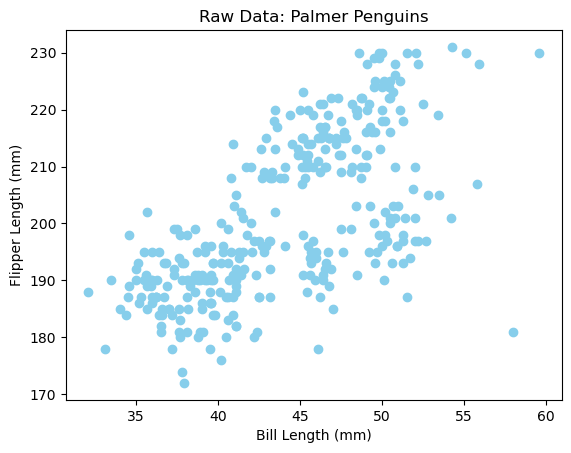

In [3]:
# Step 1: Load data and clean it
penguins_df = pd.read_csv("palmer_penguins.csv")
penguins_df = penguins_df[['bill_length_mm', 'flipper_length_mm']].dropna()
X = penguins_df.values

# Step 2: Visualize raw data
plt.scatter(X[:, 0], X[:, 1], c='skyblue')
plt.xlabel("Bill Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.title("Raw Data: Palmer Penguins")
plt.show()

In [5]:
# Step 3: Manually implement simple K-means (for K=3 as example)
def kmeans_custom(X, k=3, max_iters=10, random_state=42):
    np.random.seed(random_state)
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for iteration in range(max_iters):
        # Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Plot clusters and centroids
        plt.figure()
        for i in range(k):
            cluster_points = X[labels == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i}")
        plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
        plt.xlabel("Bill Length (mm)")
        plt.ylabel("Flipper Length (mm)")
        plt.title(f"K-Means Iteration {iteration+1}")
        plt.legend()
        plt.show()

        # Recalculate centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

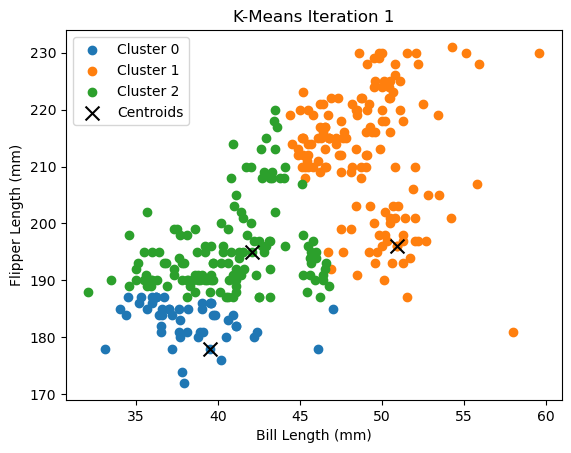

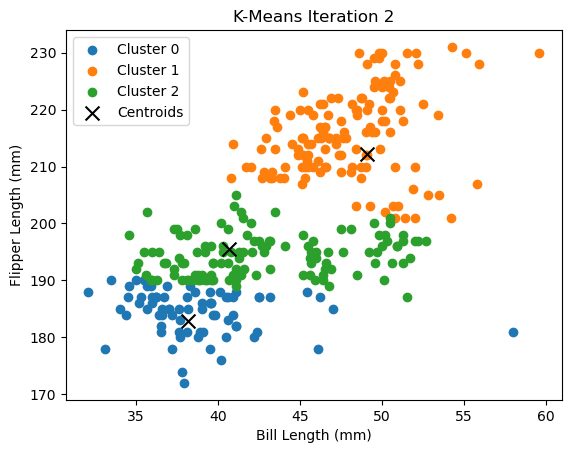

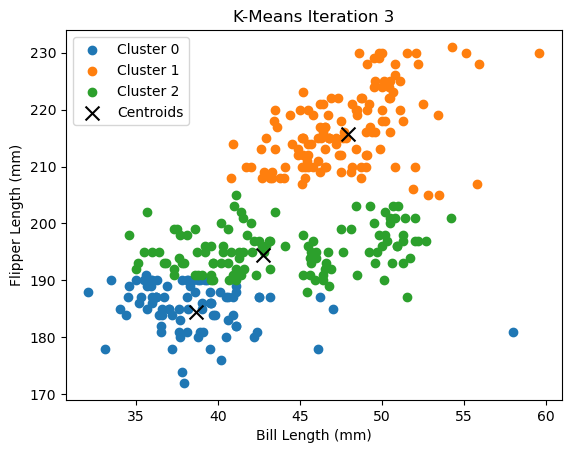

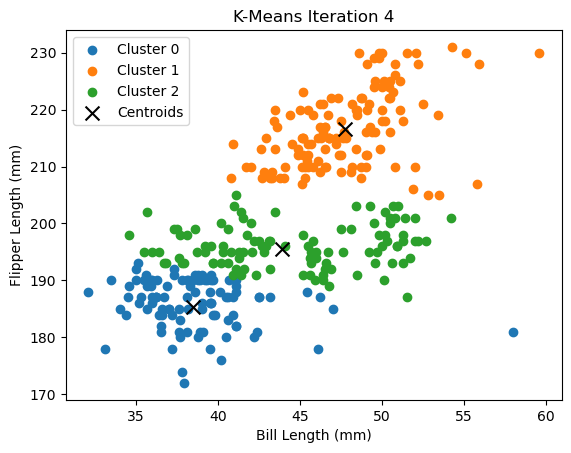

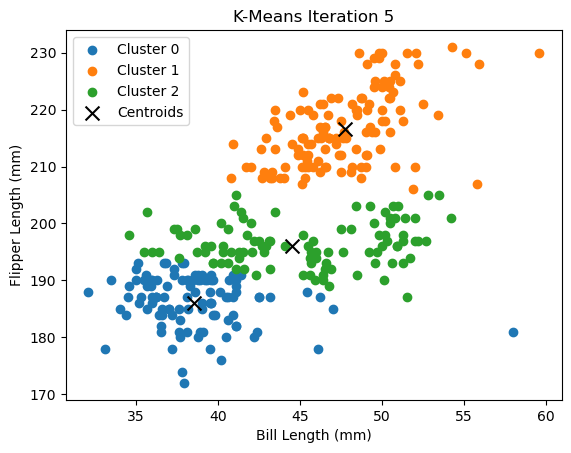

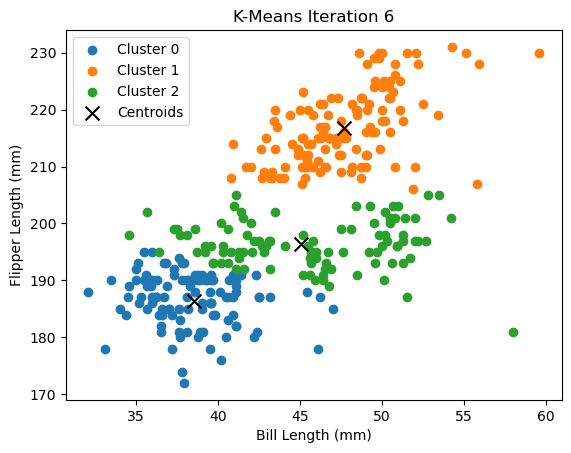

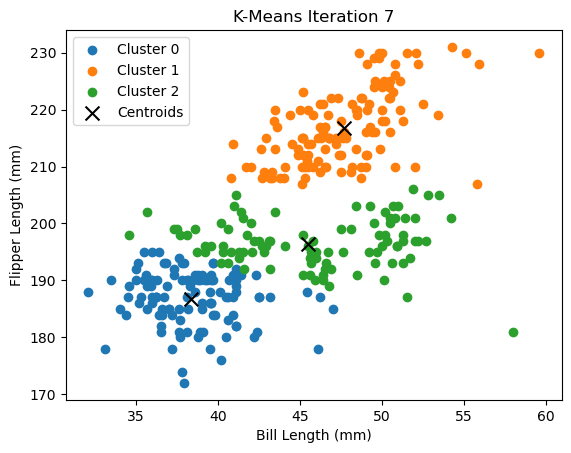

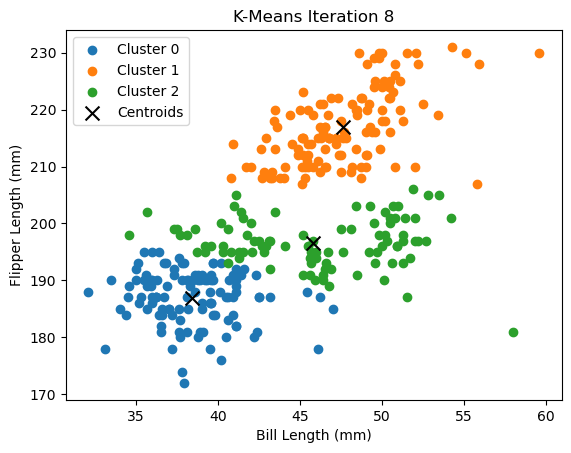

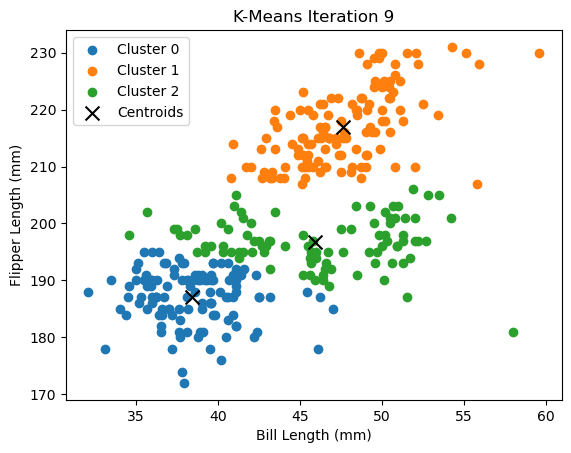

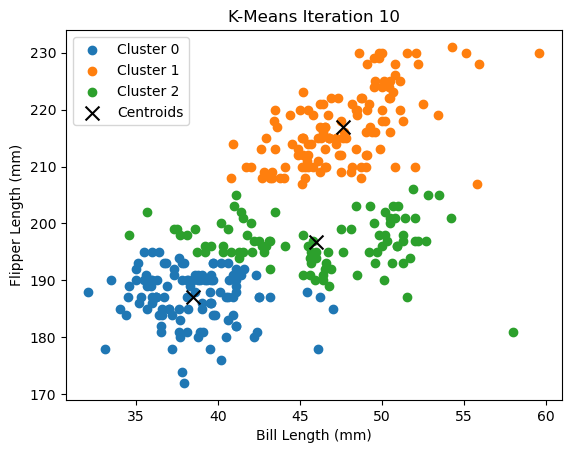

In [6]:
labels_custom, centroids_custom = kmeans_custom(X, k=3)

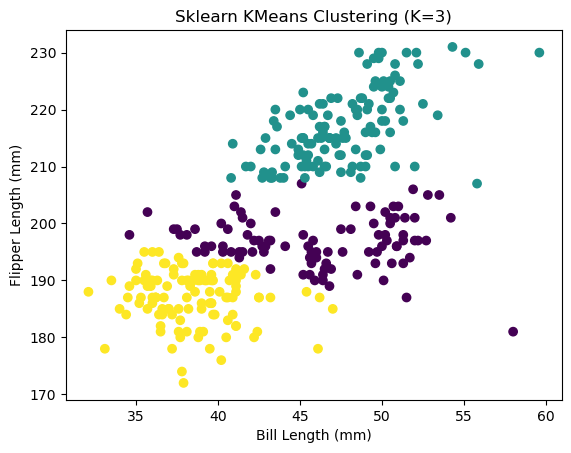

In [10]:
# Step 4: Use sklearn's KMeans and compare
kmeans_sklearn = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_sklearn = kmeans_sklearn.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn, cmap='viridis')
plt.xlabel("Bill Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.title("Sklearn KMeans Clustering (K=3)")
plt.show()

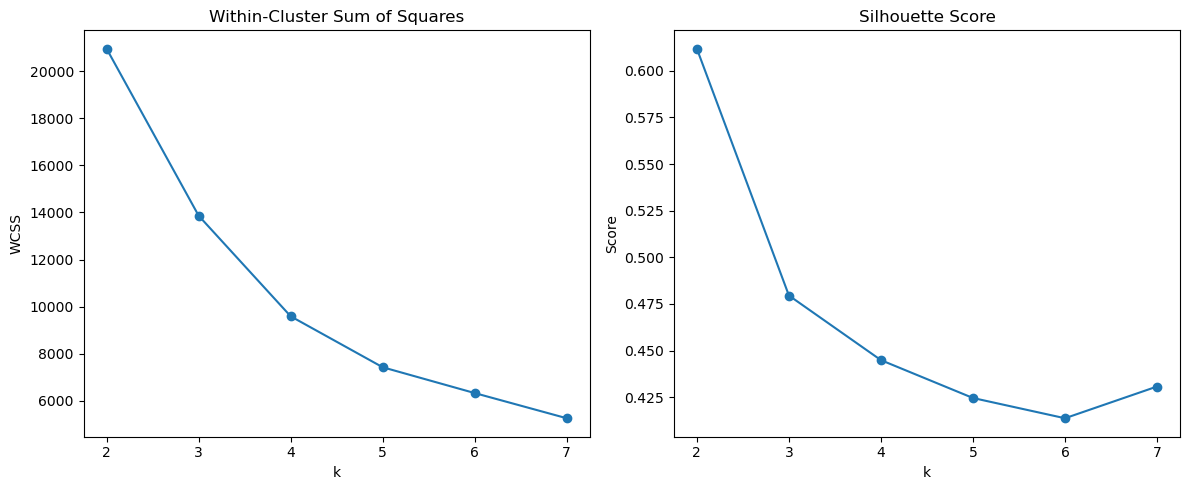

In [8]:
# Step 5: Evaluate for K=2 to 7 using WCSS and Silhouette Score
wcss = []
silhouette = []
k_values = range(2, 8)

for k in k_values:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    y_k = model.fit_predict(X)
    wcss.append(model.inertia_)
    silhouette.append(silhouette_score(X, y_k))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o')
plt.title("Within-Cluster Sum of Squares")
plt.xlabel("k")
plt.ylabel("WCSS")

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette, marker='o')
plt.title("Silhouette Score")
plt.xlabel("k")
plt.ylabel("Score")
plt.tight_layout()
plt.show()
